<a href="https://colab.research.google.com/github/IamJOY-thecoder/My-Capstone-Project/blob/master/Eniye_Joy_Capstone_Project_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages Installed and Dataframe created from Data.gov


> Reformated the Date column



In [28]:
!pip install pandas
!pip install sodapy
!pip install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique
from sodapy import Socrata
import calendar
from datetime import datetime

missing_values = ['na', 'n/a', ' ']

df = pd.read_csv('https://data.ct.gov/api/views/rybz-nyjw/rows.csv', na_values = missing_values)
df.Date = df.Date.astype(str)

df['Date'] = pd.to_datetime(df['Date']).dt.normalize()
#df = df.set_index('ID')
df

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,2014-06-28,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,2013-03-21,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,2016-03-13,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,NaN,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,2016-03-31,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,NaN,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2013-02-13,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,NaN,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,2015-09-08,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,NEW HAVEN,Residence,NaN,NaN,Residence,NaN,NaN,NaN,Acute Intoxication due to the Combined Effects...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)"
5101,17-0618,2017-07-22,DateReported,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,Hospital,NaN,Drug Abuse,In Vehicle,NaN,NaN,NaN,"Multidrug Toxicity Including Heroin, Alprazola...",NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)"
5102,18-0646,2018-08-14,DateofDeath,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,FAIRFIELD,Other,NaN,Drug abuse,Hotel or Motel,DANBURY,FAIRFIELD,NaN,"Multidrug Toxicity Including Heroin, Fentanyl,...",NaN,Y,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"DANBURY, CT\n(41.393666, -73.451539)"
5103,14-0124,2014-03-16,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,NaN,Other,NaN,Substance Abuse,Hotel or Motel,NaN,NaN,NaN,Acute Fentanyl intoxication,Cardiac hypertrophy,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"


# Number of Rows and Columns in Dataset

In [ ]:
df.shape

(5105, 40)

# Total Number of Drug Related Deaths between 2012-2018 in CT

> Using the total number of IDs issued to victims




In [23]:
df[['ID']].count()



ID    5105
dtype: int64

# Races Affected by Drug Abuse and their Totals

Race
Hawaiian                     1
Native American, Other       1
Chinese                      2
Other                       11
Asian Indian                14
Asian, Other                18
Unknown                     23
Hispanic, Black             24
Black                      433
Hispanic, White            561
White                     4004
Name: ID, dtype: int64




Text(0, 0.5, 'Race')

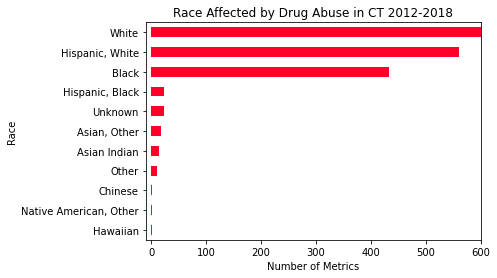

In [13]:
# Horizontal bar graph displaying the different races affected by drugs in CT 2012-201

df2 = pd.DataFrame.from_records(df)

Race=df2.groupby(['Race'])['ID'].nunique().sort_values(ascending=True)
print(Race)
print("\n")
Race_graph=Race.plot(kind='barh',colormap='gist_rainbow')
plt.xlim(-10,600) 
plt.title('Race Affected by Drug Abuse in CT 2012-2018')
plt.xlabel('Number of Metrics')
plt.ylabel('Race')


# Total Number of Male & Female Victims



> Including unknown



In [2]:
df['Sex'].value_counts()

Male       3773
Female     1325
Unknown       1
Name: Sex, dtype: int64

# The Sex & Average age of victims

> including the unknown



In [3]:
df.groupby("Sex")["Age"].mean()


Sex
Female     42.538868
Male       41.754307
Unknown    66.000000
Name: Age, dtype: float64

# Counting Male & Female Victims < 18 years 

In [24]:
Count_male = (df[(df.Age < 18) & (df.Sex == 'Male')].count())
print("The number of male victims less than 18 years old is " + (str(Count_male.Sex)))

print("")

Count_female = (df[(df.Age < 18) & (df.Sex == 'Female')].count())
print("The number of female victims less than 18 years old is " + (str(Count_female.Sex)))

The number of male victims less than 18 years old is 6

The number of female victims less than 18 years old is 7


# Male & Female Victims >= 18 years

In [29]:
Count_male = (df[(df.Age >= 18) & (df.Sex == 'Male')].count())
print("The number of male victims less than 18 years old is " + (str(Count_male.Sex)))

print("")

Count_female = (df[(df.Age >= 18) & (df.Sex == 'Female')].count())
print("The number of female victims less than 18 years old is " + (str(Count_female.Sex)))


The number of male victims less than 18 years old is 3767

The number of female victims less than 18 years old is 1318


#  Number of Heroine & Cocaine Related Deaths

> (Top 2 Most Abused Drugs)




In [7]:
df['Heroin'].value_counts()


Y    2529
Name: Heroin, dtype: int64

In [ ]:
df['Cocaine'].value_counts()


Y    1521
Name: Cocaine, dtype: int64

# Harmful drugs that caused deaths in 2012 - 2018

In [ ]:
df= pd.DataFrame(df, columns = ['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
        'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 
        'Hydromorphone', 'Other', 'OpiateNOS', 'AnyOpioid' ])
df

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
ID,,,,,,,,,,,,,,,,,
14-0273,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13-0102,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16-0165,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
16-0208,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
13-0052,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15-0466,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17-0618,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18-0646,Y,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y


# Displaying the Minimum, Maximum, Median age of victims


> 
Specific combinations of aggregating statistics can be defined using the DataFrame.agg() method


In [4]:
df.agg({'Age': ['min', 'max', 'median', 'skew']})

,Age
min,14.000000
max,87.000000
median,42.000000
skew,0.101118
